In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree,svm
from sklearn.metrics import accuracy_score

In [71]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [72]:
print('The shape of our training set: %s passengers and %s features'%(train_data.shape[0],train_data.shape[1]))

The shape of our training set: 891 passengers and 12 features


In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


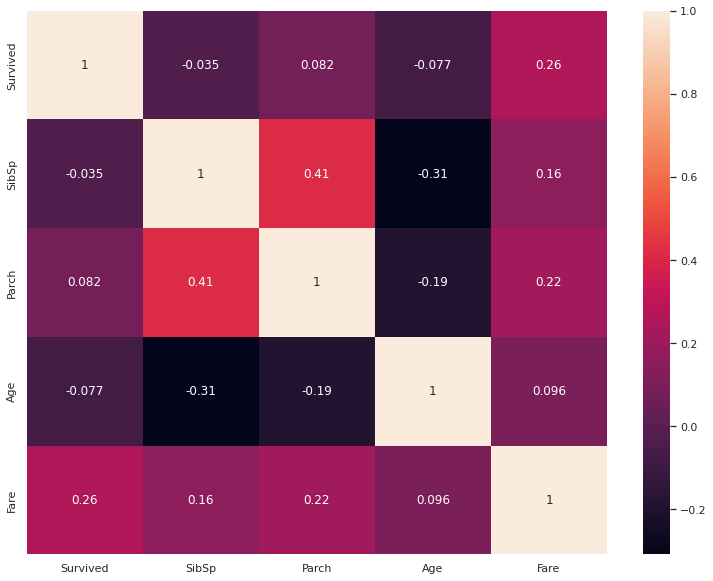

In [74]:
heatmap = sns.heatmap(train_data[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), annot = True)
sns.set(rc={'figure.figsize':(13,10)})

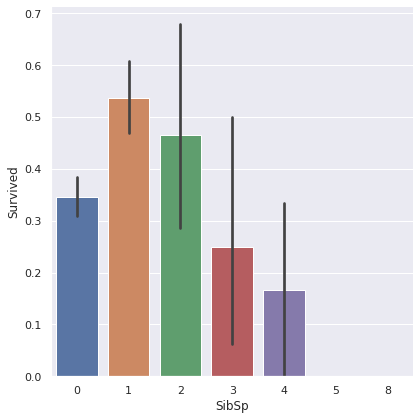

In [75]:
train_data['SibSp'].unique()
bargraph_sibsp = sns.catplot(x = "SibSp", y = "Survived", data = train_data, kind="bar", height = 6)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


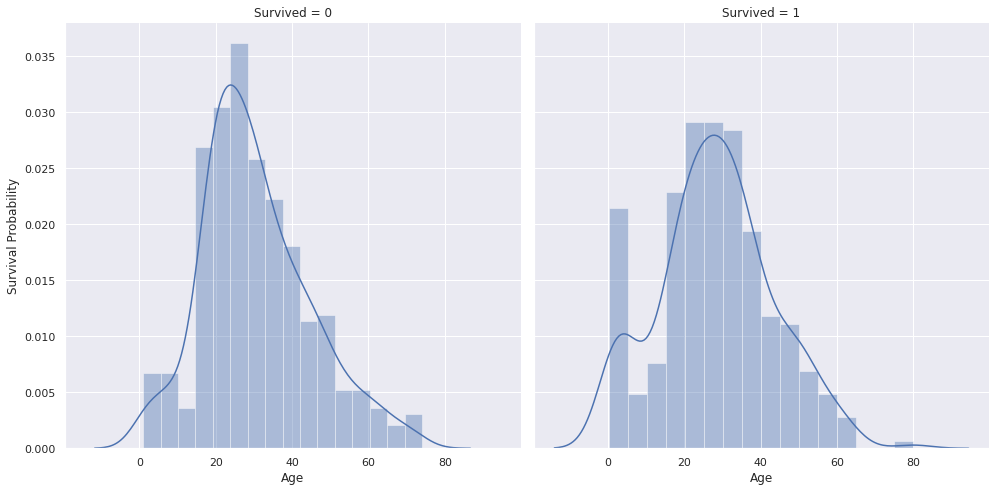

In [76]:
ageplot = sns.FacetGrid(train_data, col="Survived", height = 7)
ageplot = ageplot.map(sns.distplot, "Age")
ageplot = ageplot.set_ylabels("Survival Probability")

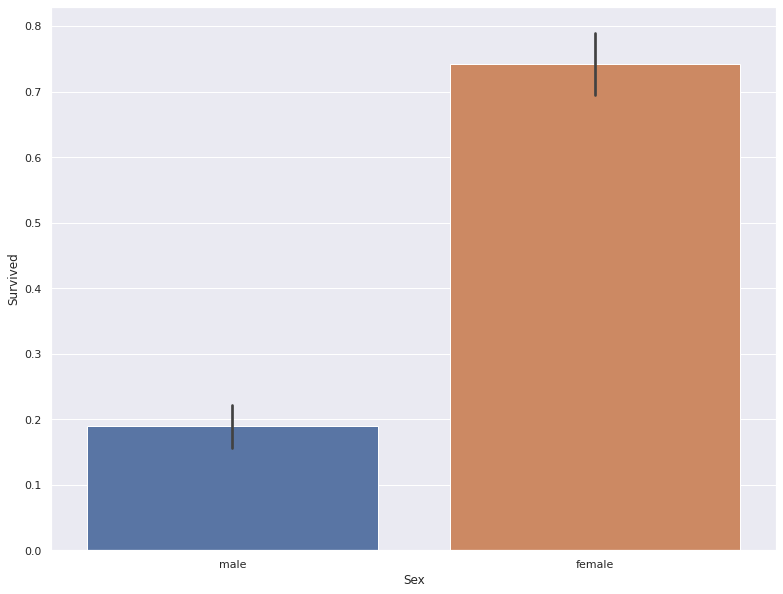

In [77]:
sexplot = sns.barplot(x="Sex", y="Survived", data=train_data)

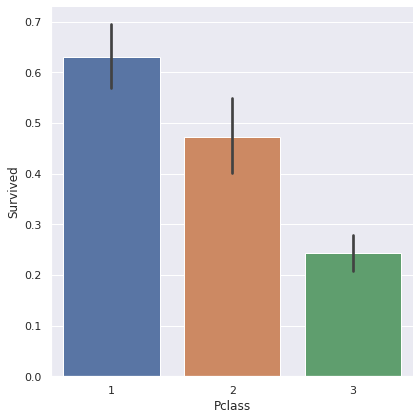

In [78]:
pclassplot = sns.catplot(x = "Pclass", y="Survived", data = train_data, kind="bar", height = 6)

In [79]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
mean = train_data["Age"].mean()
std = train_data["Age"].std()

rand_age = np.random.randint(mean-std, mean+std, size = 177)
age_slice = train_data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
train_data["Age"] = age_slice

# Again checking for null values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
col_to_drop = ["PassengerId", "Ticket", "Cabin", "Name", "Embarked"]
train_data.drop(col_to_drop, axis=1, inplace=True)
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,19.0,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


In [82]:
genders = {"male":0, "female":1}
train_data["Sex"] = train_data["Sex"].map(genders)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [83]:
df_train_x = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

# Target variable column
df_train_y = train_data[['Survived']]

# Train Test Splitting
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

In [84]:
# Creating alias for Classifier
clf1 = RandomForestClassifier()

# Fitting the model using training data
clf1.fit(x_train, y_train.values.ravel())

# Predicting on test data
rfc_y_pred = clf1.predict(x_test)

# Calculating Accuracy to compare all models
rfc_accuracy = accuracy_score(y_test,rfc_y_pred) * 100
print("accuracy=",rfc_accuracy)

accuracy= 77.6536312849162


In [91]:
clf2 = LogisticRegression()
clf2.fit(x_train, y_train)
lr_y_pred = clf2.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr_y_pred)*100

print("accuracy=",lr_accuracy)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AttributeError: 'str' object has no attribute 'decode'

In [87]:
clf3 = KNeighborsClassifier(5)
clf3.fit(x_train, y_train.values.ravel())
knc_y_pred = clf3.predict(x_test)
knc_accuracy = accuracy_score(y_test,knc_y_pred)*100

print("accuracy=",knc_accuracy)

accuracy= 68.15642458100558


In [88]:
clf4 = tree.DecisionTreeClassifier()
clf4 = clf4.fit(x_train, y_train)
dtc_y_pred = clf4.predict(x_test)
dtc_accuracy = accuracy_score(y_test,dtc_y_pred)*100

print("accuracy=",dtc_accuracy)

accuracy= 73.18435754189943


In [89]:
clf5 = svm.SVC()
clf5.fit(x_train, y_train.values.ravel())
svm_y_pred = clf5.predict(x_test)
svm_accuracy = accuracy_score(y_test,svm_y_pred)*100
print("accuracy=",svm_accuracy)

accuracy= 65.36312849162012


In [90]:
print("Accuracy of Random Forest Classifier =",rfc_accuracy)
print("Accuracy of Logistic Regressor =",lr_accuracy)
print("Accuracy of K-Neighbor Classifier =",knc_accuracy)
print("Accuracy of Decision Tree Classifier = ",dtc_accuracy)
print("Accuracy of Support Vector Machine Classifier = ",svm_accuracy)

Accuracy of Random Forest Classifier = 77.6536312849162
Accuracy of Logistic Regressor = 79.3296089385475
Accuracy of K-Neighbor Classifier = 68.15642458100558
Accuracy of Decision Tree Classifier =  73.18435754189943
Accuracy of Support Vector Machine Classifier =  65.36312849162012


In [92]:
# Importing test.csv
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [93]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [94]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [95]:
mean = test_data["Age"].mean()
std = test_data["Age"].std()

rand_age = np.random.randint(mean-std, mean+std, size = 86)
age_slice = test_data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
test_data["Age"] = age_slice

# Again checking for null values
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [96]:
# Replacing missing value of Fare column
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [97]:
col_to_drop = ["PassengerId", "Ticket", "Cabin", "Name", "Embarked"]
test_data.drop(col_to_drop, axis=1, inplace=True)
test_data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
5,3,male,14.0,0,0,9.2250
6,3,female,30.0,0,0,7.6292
7,2,male,26.0,1,1,29.0000
8,3,female,18.0,0,0,7.2292
9,3,male,21.0,2,0,24.1500


In [98]:
genders = {"male":0, "female":1}
test_data["Sex"] = test_data["Sex"].map(genders)

test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [99]:
x_test = test_data
y_pred = clf1.predict(x_test)
originaltest_data = pd.read_csv('/kaggle/input/titanic/test.csv')
submission = pd.DataFrame({
        "PassengerId": originaltest_data["PassengerId"],
        "Survived": y_pred
    })
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
